# HOJA DE TRABAJO 2 CLUSTERING

Raul Jimenez 19017

Oscar Saravia 19322

Donaldo Garcial 19683

In [89]:
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
from sklearn.cluster import KMeans, AgglomerativeClustering
import seaborn as sns
import random
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
# import pyclustertend
import sklearn.mixture as mixture
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.metrics import silhouette_samples
from sklearn import datasets
from sklearn.cluster import DBSCAN
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
import matplotlib.cm as cm

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [90]:
movies = pd.read_csv('./movies.csv', encoding ='latin')

## Preprocesamiento
1. Haga el preprocesamiento del dataset, explique qué variables no aportan información a la 
generación de grupos y por qué. Describa con qué variables calculará los grupos.

**Logramos concluir que las variables que no aportan informacion para la generacion de grupos son todas aquellas cuantitativas debido a que no nos permiten optener datos cuantitativos. Las variables como castWomenAmount, castMenAmount debido a que solamente nos dicen la cantidad de mujeres y/o hombre que hubieron en la pelicula lo cual no aporta mayor valor a los datos. Al igual que la variable de productionCoAmount debido a que solamente nos dice la cantidad de compañias que participaron en la producion lo cual no tiene tanto valor para obtener un analicis estadistico al igual que ProductionCompanyCountry debido a que solo nos dice paises en los que se llevo acabo la producion. La variable de id tampoco sera de utilidad debidoa a que es solamente un identificador secuencial. Al igual que release date no nos brinda informacion relevante para saber si fue un exito o no. De igual forma no se van a usar las de genreAmount y productionCountryAmount debido a que la cantidad de generos y la cantidad de lugares nos nos indican que tanto exito tienen.**

**Las variables que nos ayudaran a calcular los grupos son las demas variables cuantitativas debidos a que son las que mas informacion brinand sobre que tan importatne fue la pelicula tanto para las personas que la vieron como para los que la producieron. Con esos datos se pueden armar grupos e identificar correlaciones entre variables.** 

In [91]:
usefullAttr = ['budget', 'revenue', 'popularity', 'voteAvg', 'voteCount', 'actorsAmount'] 

In [92]:
datos = movies[usefullAttr]
datos

columns = list(movies.describe().columns[1:])
columns.extend(['actorsPopularity', 'castWomenAmount', 'castMenAmount', 'popular'])
datos_copia = movies
popular = []
generos = []
for index, row in datos_copia.iterrows():
  try:
    data = row['actorsPopularity'].split('|')
    value = np.sort(np.array(data).astype(float))[-1]
    generos.append(row['genres'].split('|')[0])
    popular.append(value)
  except:
    datos_copia = datos_copia.drop(index=index)


datos_copia['popular'] = popular
datos_copia['genre'] = generos
columns.remove('actorsPopularity')
columns.remove('budget')
columns.remove('runtime')
data = np.array(datos_copia[columns])
tags_list = list(np.array(datos_copia[['genre']]))

aux = datos_copia.groupby(by='genre')
groups = list(aux.groups.keys())
tags = []
tag_number = {}
number_tag = {}

for i in range(len(groups)): 
  tag_number[groups[i]] = i
  number_tag[i] = groups[i]

for i in range(len(tags_list)):
  tags.append(tag_number[tags_list[i][0]])


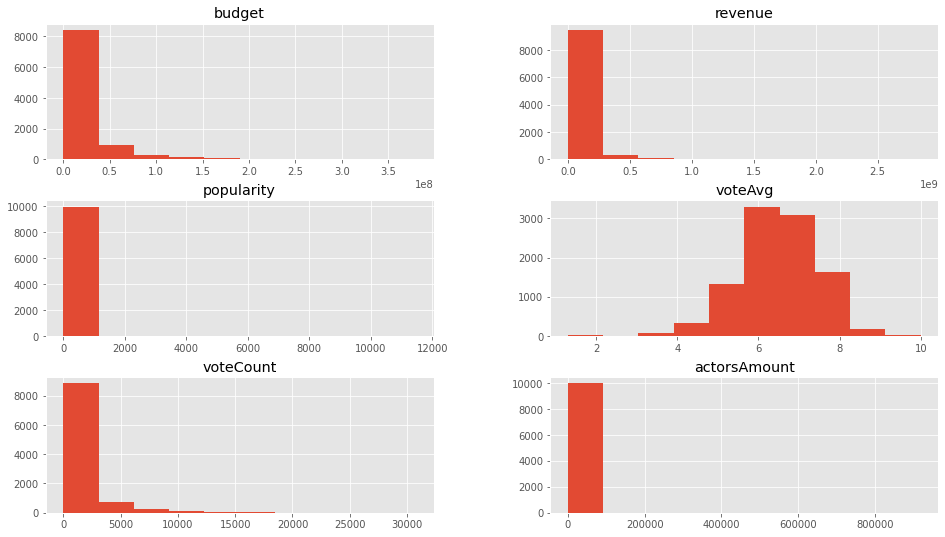

In [93]:
datos.hist()
plt.show() 

## Tendencia al agrupamiento
2. Analice la tendencia al agrupamiento usando el estadístico de Hopkings y la VAT (Visual Assessment 
of cluster Tendency). Discuta sus resultados e impresiones. 

Con nuestra grafica de vat y test de hopkings logramos determinar que si es factible agrupar los datos para clustering. El test de hopkings queda con un dato de 0.0091 lo cual como esta lejano a 0.5 nos indica que si es viable relizar este tipo de analizis

In [94]:
# NORMALIZAMOS DATOS
X = []
for x, column in datos.iterrows():
    try:
        column
        datos[column] = (datos[column]-datos[column].mean())/datos[column].std()
        X.append(datos[column])
    except:
        continue
data_clean = datos.dropna(subset=usefullAttr, inplace=True)
X_Scale = np.array(datos)
X_Scale

/var/folders/q1/c6bggw2x74z5vcrx1tbn_7s00000gn/T/ipykernel_17139/3732926392.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean = datos.dropna(subset=usefullAttr, inplace=True)


array([[4.00000000e+06, 4.25735400e+06, 2.08800000e+01, 5.70000000e+00,
        2.07700000e+03, 2.50000000e+01],
       [2.10000000e+07, 1.21369380e+07, 9.59600000e+00, 6.50000000e+00,
        2.23000000e+02, 1.50000000e+01],
       [1.10000000e+07, 7.75398007e+08, 1.00003000e+02, 8.20000000e+00,
        1.65980000e+04, 1.05000000e+02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 5.65658000e+02, 6.10000000e+00,
        3.00000000e+01, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.66400000e+00, 6.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.54056000e+05, 2.54042000e+05, 8.37470000e+01, 4.70000000e+00,
        3.00000000e+00, 8.00000000e+00]])

In [95]:
# HOPKINGS
X_scale=sklearn.preprocessing.scale(X_Scale)
# X = X_scale
pyclustertend.hopkins(X_scale,len(X_scale))

NameError: name 'pyclustertend' is not defined

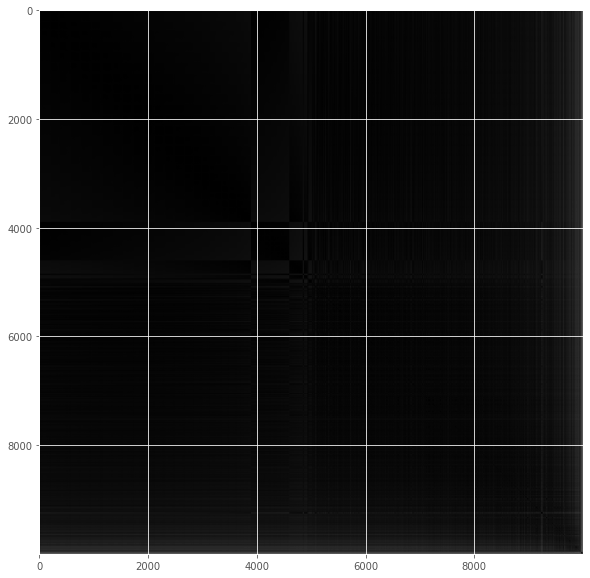

In [ ]:
 # VAT
pyclustertend.vat(X_Scale)

## Numero de grupos
3. Determine cuál es el número de grupos a formar más adecuado para los datos que está trabajando. 
Haga una gráfica de codo y explique la razón de la elección de la cantidad de clústeres con la que 
trabajará. 

Se trabajara con 2 o 6 grupos/clusters debido a que nuestra grafica de codo es donde se observa mas pronunciado el codo.

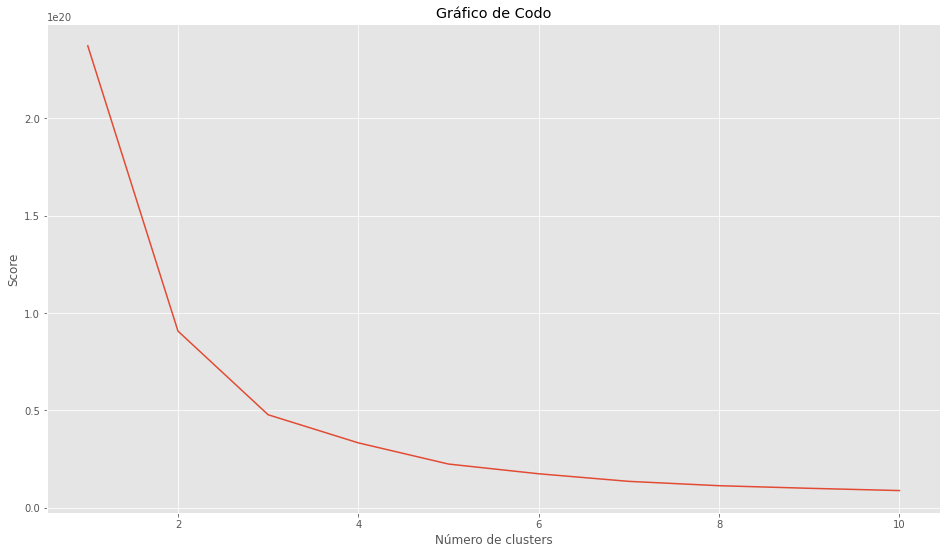

In [96]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(X_Scale)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

k = 6 ya es que donde se ve mas pronunciado el codo en nuestra grafica

## Algoritmos de agrupamientos
4. Utilice 3 algoritmos existentes para agrupamiento. Compare los resultados generados por cada uno.

Agrupamientos obtenidos de: https://www.freecodecamp.org/espanol/news/8-algoritmos-de-agrupacion-en-clusteres-en-el-aprendizaje-automatico-que-todos-los-cientificos-de-datos-deben-conocer/

#### Agrupamiento K-means

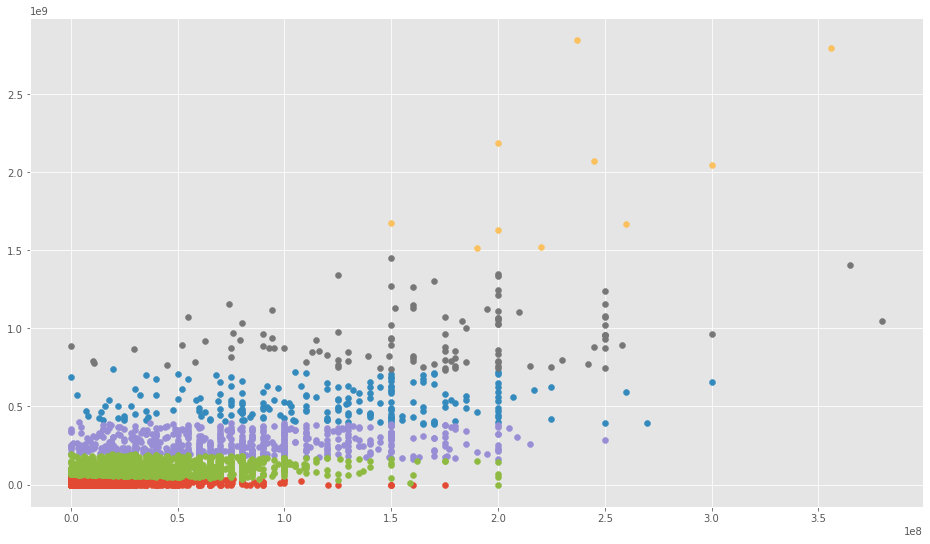

In [97]:
kmeans = cluster.KMeans(n_clusters=6)
kmeans.fit(X_Scale)
kmeans_result = kmeans.predict(X_Scale)
kmeans_clusters = np.unique(kmeans_result)
for kmeans_cluster in kmeans_clusters:
    # get data points that fall in this cluster
    index = np.where(kmeans_result == kmeans_cluster)
    # make the plot
    plt.scatter(X_Scale[index, 0], X_Scale[index, 1])
plt.show()

#### Algoritmo de Mezcla Gaussiana

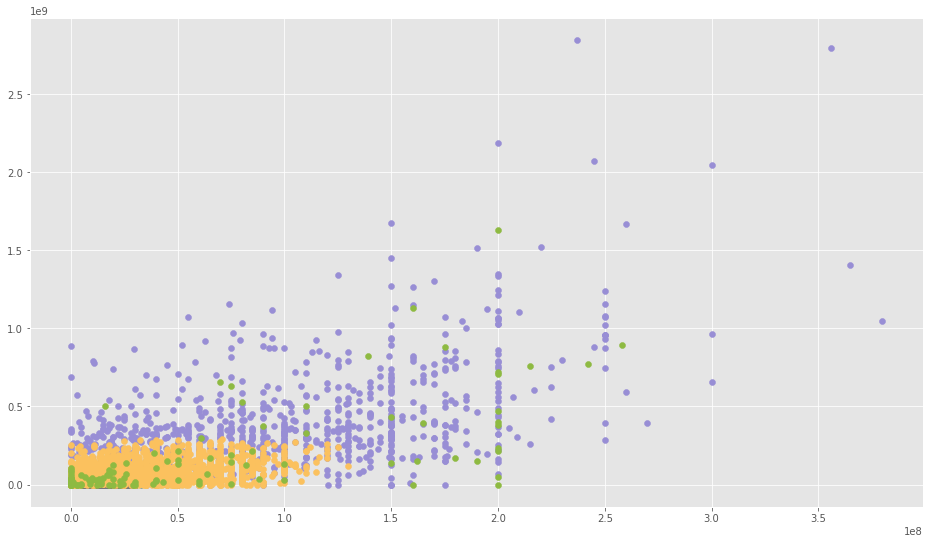

In [ ]:
gaussian_model = GaussianMixture(n_components=6)
gaussian_model.fit(X_Scale)
gaussian_result = gaussian_model.predict(X_Scale)
gaussian_clusters = unique(gaussian_result)

# graficar los grupos de Mezcla Gaussiana
for gaussian_cluster in gaussian_clusters:
    index = where(gaussian_result == gaussian_cluster)
    pyplot.scatter(X_Scale[index, 0], X_Scale[index, 1])

# mostrar el gráfico de Mezcla Gaussiana
pyplot.show()

#### Algoritmo de agrupamiento por Propagación de Afinidad

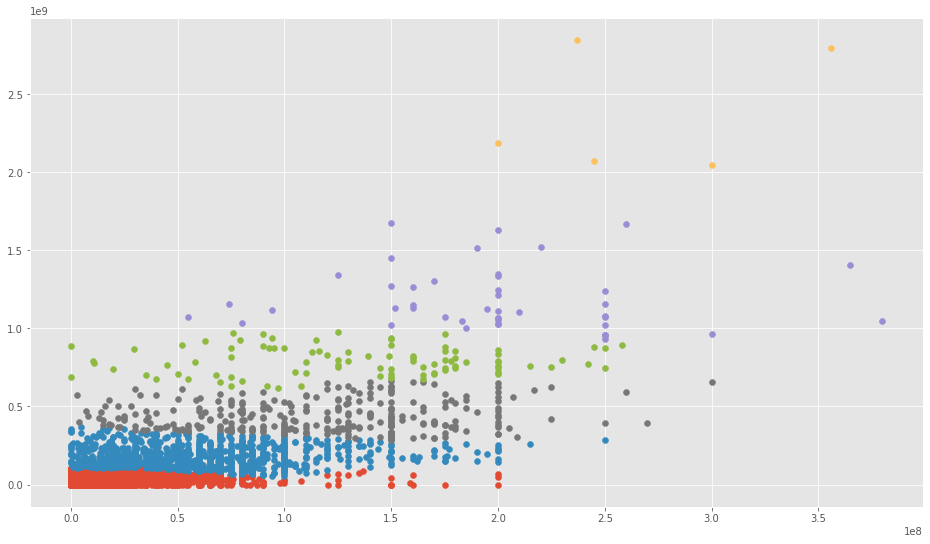

In [ ]:
birch_model = Birch(threshold=0.03, n_clusters=6)
birch_model.fit(X_Scale)
birch_result = birch_model.predict(X_Scale)
birch_clusters = unique(birch_result)

# graficar los grupos BIRCH
for birch_cluster in birch_clusters:
    index = where(birch_result == birch_cluster)
    pyplot.scatter(X_Scale[index, 0], X_Scale[index, 1])
# mostrar el gráfico BIRCH
pyplot.show()

#### Agrupamiento DBSCAN

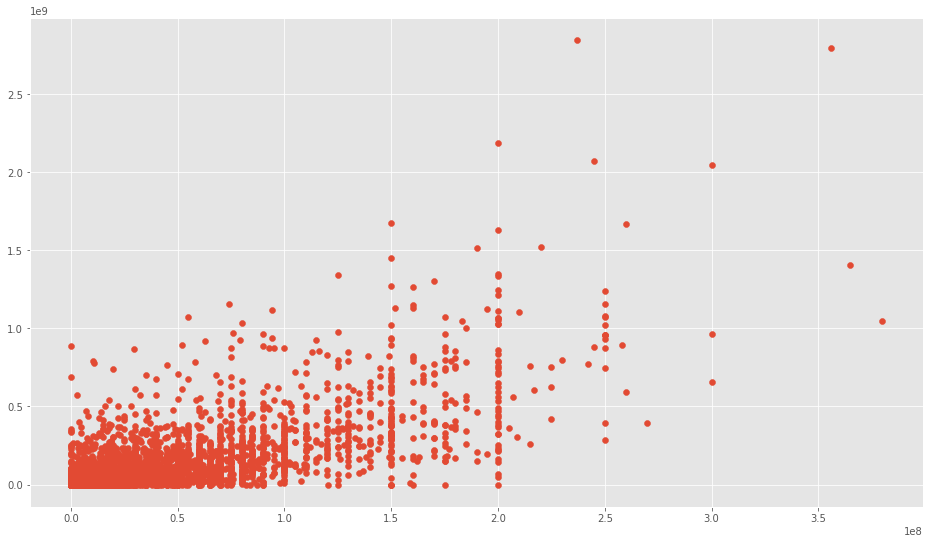

In [ ]:
dbscan_model = DBSCAN(eps=0.25, min_samples=6)
dbscan_model.fit(X_Scale)
dbscan_result = dbscan_model.fit_predict(X_Scale)
dbscan_clusters = np.unique(dbscan_result)
for dbscan_cluster in dbscan_clusters:
    index = np.where(dbscan_result == dbscan_cluster)
    plt.scatter(X_Scale[index, 0], X_Scale[index, 1])
plt.show()

In [ ]:
def silueta(cluster, n, titulo):
    fig, eje = plt.subplots(figsize=(1,1))
    fig.set_size_inches(18, 7)

    eje.set_xlim([-0.1, 1])
    eje.set_ylim([0, len(X_scale) + (n + 1) * 10])

    clabels = cluster.fit_predict(X_scale)
    promedio = silhouette_score(X_scale, clabels)
    silueta_prueba = silhouette_samples(datos, clabels)
    min =10

    for i in range(0, n):
        valores = silueta_prueba[clabels == i]
        valores.sort()
        size = valores.shape[0]
        max = min + size
        color = cm.nipy_spectral(float(i) / n)
        eje.fill_betweenx(np.arange(min, max), 0, valores, facecolor=color, edgecolor=color, alpha=0.7,)
        eje.text(-0.05, min + 0.5 * size, str(i))
        min = max + 10

    eje.set_title(titulo)
    eje.set_xlabel("Valores")
    eje.set_ylabel("Nombre")
    eje.axvline(x=promedio, color="red", linestyle="--")
    eje.set_yticks([]) 
    eje.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])



NameError: name 'gaussian_model' is not defined

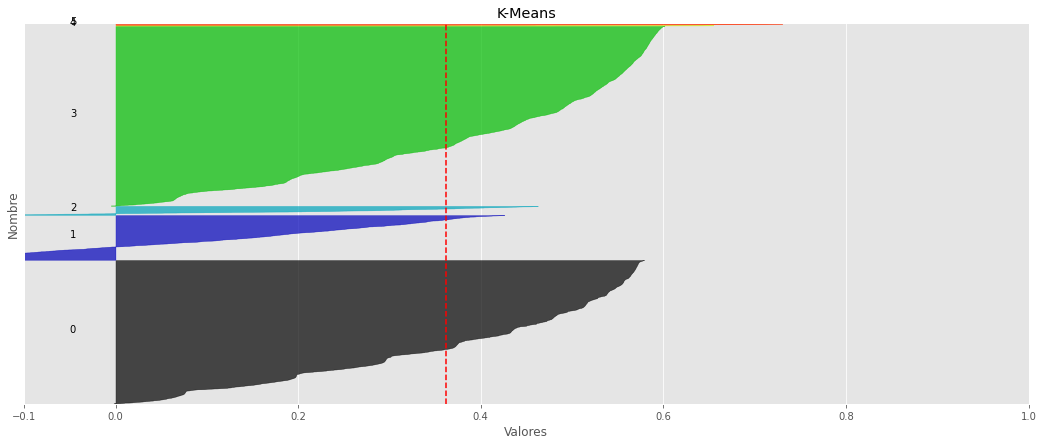

In [ ]:
silueta(kmeans, 6, 'K-Means')
silueta(gaussian_model, 6, 'Gaussian')
silueta(birch_model, 6, 'Birch')
silueta(dbscan_model, 6, 'DBScan')
plt.show()

In [ ]:
confusion_kmeans = confusion_matrix(kmeans_result[0:9853], tags)[0:6]
confusion_gaussian = confusion_matrix(gaussian_result[0:9853], tags)[0:6]
confusion_birch = confusion_matrix(birch_result[0:9853], tags)[0:6]
confusion_dbscan = confusion_matrix(dbscan_result[0:9853], tags)[0:6]

def get_category(confusion_array, label=''):
  print('\nConfusion de:', label)
  keys = list(tag_number.keys())
  for i in range(6):
    print('\nCluster: ', i+1)
    result = list(confusion_array[i])
    index = result.index(max(result))
    for j in range(len(keys)):
      print(f'{result[j]} ----> {keys[j]}')
    print(f'Grupo: {keys[index]} con {result[index]}')

get_category(confusion_kmeans, 'K-MEANS')
get_category(confusion_gaussian, 'Gaussian')
get_category(confusion_birch, 'Birch')
get_category(confusion_dbscan, 'Dbscan')


Confusion de: K-MEANS

Cluster:  1
1152 ----> Action
358 ----> Adventure
649 ----> Animation
1164 ----> Comedy
307 ----> Crime
212 ----> Documentary
1437 ----> Drama
290 ----> Family
163 ----> Fantasy
33 ----> History
771 ----> Horror
84 ----> Music
88 ----> Mystery
262 ----> Romance
237 ----> Science Fiction
39 ----> TV Movie
455 ----> Thriller
61 ----> War
50 ----> Western
Grupo: Drama con 1437

Cluster:  2
32 ----> Action
25 ----> Adventure
20 ----> Animation
16 ----> Comedy
1 ----> Crime
2 ----> Documentary
22 ----> Drama
4 ----> Family
6 ----> Fantasy
0 ----> History
7 ----> Horror
0 ----> Music
2 ----> Mystery
3 ----> Romance
3 ----> Science Fiction
0 ----> TV Movie
10 ----> Thriller
1 ----> War
1 ----> Western
Grupo: Action con 32

Cluster:  3
96 ----> Action
49 ----> Adventure
42 ----> Animation
72 ----> Comedy
14 ----> Crime
4 ----> Documentary
65 ----> Drama
23 ----> Family
16 ----> Fantasy
0 ----> History
20 ----> Horror
2 ----> Music
1 ----> Mystery
13 ----> Romance
15 ---